## **Data Engineering Task Notebook**

This notebook is designed to test you through various Data Engineering tasks using the Online Retail II dataset. The tasks will help you develop essential skills in data cleaning, feature engineering, and transforming raw data into valuable insights. You'll explore tasks like handling missing values, aggregating data, creating new features, and performing data joins to simulate real-world data workflows. These tasks will prepare you for more advanced data manipulation and analysis, enhancing your ability to work with large, complex datasets.

# **About the Dataset**
This Online Retail II dataset contains transactional data from a UK-based online retailer selling unique gift-ware. The data covers transactions that occurred between December 1, 2009 and December 9, 2011. The retailer primarily serves both individual customers and wholesalers. The products sold by the company are all-occasion gift items, including home décor, kitchenware, and other unique items.

The dataset includes detailed information on each transaction, providing valuable insights into customer behavior, sales trends, and product performance over time.



## **What can be done with this dataset?**

**Customer Behavior Analysis:** Explore purchasing patterns, repeat customers, and sales volume across different customer segments.

**Sales Forecasting:** Predict future sales by analyzing past transactions, including seasonal trends and demand fluctuations.

**Market Segmentation:** Identify customer groups based on purchase history and demographic data (e.g., by Country).

**Product Performance:** Analyze which products are bestsellers and which have low turnover, and how prices influence sales.

**Time Series Analysis:** Study trends over time, including hourly, daily, and monthly sales volumes, and identify peak shopping periods.

**Anomaly Detection:** Detect potential fraudulent transactions, cancellations, or unusually high sales activity.
Association Rule Mining: Discover products that are often purchased together and identify cross-sell opportunities.



## **Key Attributes in the Dataset:**

**InvoiceNo:** Unique transaction identifier (with cancellations indicated by 'C' prefix).

**StockCode:** Unique product code for each item sold.

**Description:** Name of the product/item sold.

**Quantity:** Quantity of each product sold in the transaction
.
**InvoiceDate:** Date and time of the transaction.

**UnitPrice:** Price per unit of the product.

**CustomerID:** Unique identifier for each customer.

**Country:** The country where the customer resides.

This dataset is a great resource for learning and practicing various data analysis, machine learning, and business intelligence techniques.

## **Exercise**
Complete the following tasks:
1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset) from Kaggle.
2. Visualize the dataset and it's structure using appropriate libraries and plots.
3. Do some basic cleaning to handle missing values
4. Create the following features:
  *   Revenue
  *   DayOfWeek: to analyze sales trends by weekdays.
  *   TotalRevenue for each CustomerID
  *   Most popular product based on Revenue.
  *   Ordersize by summing Quantity for each InvoiceNo
5. Apply a lambda function to:
  * Segment customers into tiers based on TotalRevenue (e.g., "High", "Medium", "Low").
  * Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added
  * Categorize transactions as "Small", "Medium", or "Large" based on Revenue.
  * **Detect Seasonal Items:** Flag items as "Christmas"-themed if the description contains relevant words.
  * Classify customers as "Loyal", "Occasional", or "One-time" based on the number of purchases.
  *  **Identify Multi-Item Invoices:** Flag invoices with multiple unique items as "Multi-Item Order".
7. Wrap all fo the above into an ETL pipeline.

Extra tasks for practicing GroupBy
1. Join CustomerID with TotalRevenue to create Customer_Revenue column
2. Group by Country to find total revenue, total customers, and average order size per country.
3. Group by StockCode to find top-selling products by quantity.
4. Group by CustomerID to calculate the average order value or frequency of purchases.







             








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [2]:
path = kagglehub.dataset_download("lakshmi25npathi/online-retail-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Hassan\.cache\kagglehub\datasets\lakshmi25npathi\online-retail-dataset\versions\1


In [3]:
dataset_path = "C:\\Users\\Hassan\\.cache\\kagglehub\\datasets\\lakshmi25npathi\\online-retail-dataset\\versions\\1"

files = os.listdir(dataset_path)
print(files)


['online_retail_II.xlsx']


In [4]:
file_path = "C:\\Users\\Hassan\\.cache\\kagglehub\\datasets\\lakshmi25npathi\\online-retail-dataset\\versions\\1\\online_retail_II.xlsx"

df = pd.read_excel(file_path)

In [5]:
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [6]:
print(df.info())

# takeaways
# Description  incomplete  
# Customer ID incomplete 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None


In [7]:
print(df.isnull().sum())


# takeaways
# Description 2928 null values 
# Customer ID 107927 null values

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [8]:
X = df['StockCode']
X.value_counts()


StockCode
85123A    3516
22423     2221
85099B    2057
21212     1933
21232     1843
          ... 
90005B       1
90197C       1
90080        1
20904        1
21120        1
Name: count, Length: 4632, dtype: int64

In [9]:
# Fill missing 'Description' using the most common value per 'StockCode'
df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

#Drop rows where 'Customer ID' is missing
df = df.dropna(subset=['Customer ID'])

print(df.isnull().sum())


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [10]:
#Counting duplicated rows
print(df.duplicated().sum())

6771


In [11]:
#dropping duplicated rows
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


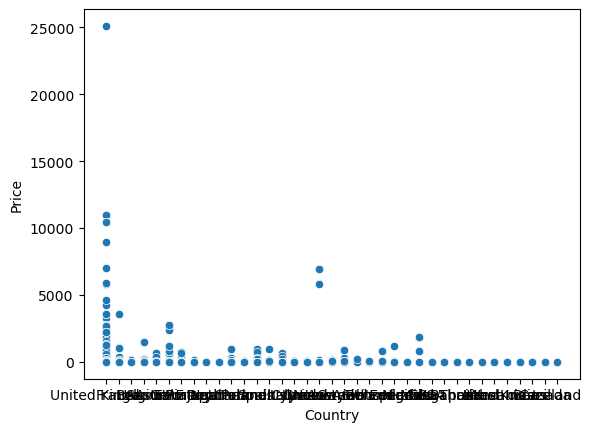

In [12]:
#Data types

# Categories
#   Country
#   Customer ID
#   StockCode
#   Invoice
#   Description

# Numeric
#   Quantity
#   InvoiceDate
#   Price
sns.scatterplot(y="Price", x="Country", data= df)
plt.show()



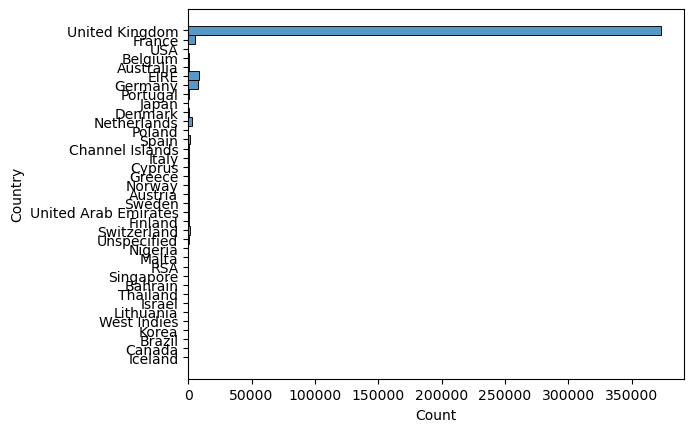

In [13]:
sns.histplot(data=df, y="Country")
plt.show()

In [14]:
grouped = df.groupby('Country')[['Price', 'Quantity']].describe()
grouped.sort_values(by= "Country", ascending=True)


Price                                              \
                         count       mean         std   min     25%    50%   
Country                                                                      
Australia                654.0   6.202324   42.508339  0.29  1.2500  1.950   
Austria                  537.0   4.623464   12.022530  0.12  0.8500  1.650   
Bahrain                   42.0   2.180000    1.872718  0.42  1.2500  1.470   
Belgium                 1053.0   6.859924   66.211023  0.00  1.2500  1.950   
Brazil                    62.0   1.834032    1.315761  0.21  0.8500  1.550   
Canada                    77.0   1.915714    1.329242  0.29  0.8500  1.650   
Channel Islands          906.0   5.870033   31.960129  0.21  1.2500  2.100   
Cyprus                   546.0   4.377070    6.205885  0.29  1.5050  2.950   
Denmark                  428.0   2.642383    3.373719  0.06  0.5500  1.650   
EIRE                    8705.0   8.202163   76.135188  0.12  1.2500  2.550   
Finland                  354.0   4.089718    8.461505  0.29  0.8500  1.950   
France                  5692.0   4.220699   52.219802  0.03  0.8500  1.650   
Germany                 8120.0   3.678575   14.981564  0.00  1.2500  1.950   
Greece                   517.0   3.650754    4.075414  0.12  1.2500  2.550   
Iceland                   71.0   2.295070    1.869887  0.38  1.0500  1.950   
Israel                    74.0   3.303108    3.284643  0.55  1.2500  2.175   
Italy                    729.0   6.307641   32.268015  0.19  1.2500  2.100   
Japan                    224.0   1.981027    1.566365  0.21  1.2500  1.650   
Korea                     63.0   2.384762    1.489488  0.12  1.2500  2.100   
Lithuania                154.0   2.564740    1.689138  0.14  1.2500  2.100   
Malta                    172.0  34.358023  217.936722  0.19  0.8500  2.550   
Netherlands             2768.0   3.312511   20.671430  0.00  0.8500  1.650   
Nigeria                   30.0   3.416000    5.209391  0.42  1.2500  1.550   
Norway                   369.0  93.769241  780.260568  0.21  0.5500  1.450   
Poland                   194.0   2.669845    3.462398  0.42  1.2500  1.650   
Portugal                1023.0   3.760479    6.936755  0.14  1.2500  2.100   
RSA                       65.0   2.299385    2.173970  0.65  1.2500  1.450   
Singapore                117.0   3.183846    2.892910  0.38  1.2500  2.100   
Spain                   1271.0   6.206161   39.574368  0.06  1.2500  1.690   
Sweden                   882.0   7.695794   59.323613  0.09  0.8500  1.450   
Switzerland             1187.0   4.411281   25.278778  0.06  1.2500  1.950   
Thailand                  76.0   2.999605    2.809477  0.42  1.2500  2.100   
USA                      244.0   4.552869   16.254736  0.42  1.2500  1.950   
United Arab Emirates     318.0   3.675157   14.781175  0.21  0.9025  1.950   
United Kingdom        372705.0   3.671777   69.359613  0.00  1.2500  1.950   
Unspecified              280.0   7.606964   71.006657  0.12  1.2500  2.100   
West Indies               54.0   2.273519    2.253860  0.19  0.8500  1.250   

                                      Quantity                           \
                       75%       max     count        mean          std   
Country                                                                   
Australia             3.75    662.25     654.0   30.662080    55.546241   
Austria               3.75    130.00     537.0   12.065177    12.238360   
Bahrain               2.85      9.95      42.0   11.785714     8.095575   
Belgium               3.75   1508.65    1053.0   11.371320    11.708590   
Brazil                2.55      6.95      62.0    3.048387     3.672795   
Canada                2.95      5.95      77.0   11.610390     6.370483   
Channel Islands       5.95    934.66     906.0   12.134658    26.362655   
Cyprus                4.95     79.95     546.0    7.978022    19.516436   
Denmark               3.48     18.00     428.0  530.443925  1946.486043   
EIRE

### Exercises

 *   Revenue
  *   DayOfWeek: to analyze sales trends by weekdays.
  *   TotalRevenue for each CustomerID
  *   Most popular product based on Revenue.
  *   Ordersize by summing Quantity for each InvoiceNo
5. Apply a lambda function to:
  * Segment customers into tiers based on TotalRevenue (e.g., "High", "Medium", "Low").
  * Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added
  * Categorize transactions as "Small", "Medium", or "Large" based on Revenue.
  * **Detect Seasonal Items:** Flag items as "Christmas"-themed if the description contains relevant words.
  * Classify customers as "Loyal", "Occasional", or "One-time" based on the number of purchases.
  *  **Identify Multi-Item Invoices:** Flag invoices with multiple unique items as "Multi-Item Order".
7. Wrap all fo the above into an ETL pipeline.

In [15]:
# Segment customers into tiers based on TotalRevenue (e.g., "High", "Medium", "Low").
df["total_revenue"] = df['Customer ID'].map(df.groupby("Customer ID")["Price"].sum())
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1041.17
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1041.17
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1041.17
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1041.17
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1041.17
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,390.62
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,390.62
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,390.62
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,390.62


In [16]:

customer_tier = lambda tier: 'Low' if tier < 139 else ('Medium' if tier <= 337 else 'High') 
df['Tier_Category'] = df['total_revenue'].apply(customer_tier)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_revenue,Tier_Category
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1041.17,High
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1041.17,High
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1041.17,High
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1041.17,High
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1041.17,High
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,390.62,High
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,390.62,High
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,390.62,High
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,390.62,High


In [17]:
# Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added
words=['set', 'assortment', 'series', 'selection']

df['isACollection'] = df['Description'].str.lower().apply(lambda x: any(word in x for word in words))

collection_counts = df['isACollection'].value_counts()
collection_counts



isACollection
False    369046
True      41717
Name: count, dtype: int64